# Analyzing play store data

in this project, our goal is to figure out what types of apps
tend to be popular on the Google play Store . We work  for a company
that makes free apps and earns money through ads. By understaing 
 which app categories are in high in demand, we can  help  our 
developers create apps that attract more users more users and generate
more revenue . We'll analyze data from the Google Play store to
identify patterns and prefrences among users . This way , we
can make smarter decisions about the kinds of apps we develop



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
dataset = pd.read_csv("googleplaystore.csv")
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Check the applications with categories
dataset["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [4]:
dataset[dataset["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
clean_lst = ["Life Made WI-Fi Touchscreen Photo Frame", "LIFESTYLE", "1.9", 19.0, "3.0M", "1,000+", "Free", "0", "Everyone",
             "LIFESTYLE", "February 11, 2018", "1.0.19", "4.0 and up"]
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [6]:
# Now Update this list where category is 1.9
dataset[dataset["Category"] == "1.9"] = clean_lst

In [7]:
dataset["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [8]:
# Checking frequency of applications
dataset["App"].value_counts()
# We must have every application one time but here we have some apps that's frequency have high it means we have duplications
app_count = dataset["App"].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [9]:
# Here we are checking those apps which have more than 1 Occurence
app_count[app_count > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [10]:
# Checking that 'Intagram' is available in duplicated apps
"Instagram" in app_count[app_count > 1]

True

In [11]:
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

## Removing Duplicate Entries

### Part One
If we explore the google play dataset long enough, we will find that some apps have more than one entry. For instance, The
Application instagram has four entries

In [12]:
dataset[dataset["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [13]:
# Check for duplicate rows based on the 'App' column, marking all duplicates as true
duplicate_apps = dataset[dataset.duplicated(subset = ["App"], keep = False)]

duplicate_apps[duplicate_apps["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [14]:
# Number of duplicate values
num_dup = duplicate_apps["App"].nunique()
num_dup

798

In [15]:
duplicate_apps.shape

(1979, 13)

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed two cells above for the instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. the different numbers show that data was collected at different times. We can use this to build a criterion for keeping rows. We will not remove rows randomly but rather we will keep the rows that have the highest number of reviews, the more reliable the ratings 

## Part Two
Let's start by building the dictionary 

In [16]:
# Group by 'app' and get the maximum number of reviews for each app
max_reviews = dataset.groupby("App")["Reviews"].max()
max_reviews

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [17]:
# Create a empty list to store cleaned data
android_clean = []

# Create a empty list to check already added apps
already_added = []

for index, row in dataset.iterrows():
    name = row["App"]
    n_reviews = row["Reviews"]
    
    if (max_reviews[name] == n_reviews) and (name not in already_added):
        android_clean.append(row)
        already_added.append(name)

In [18]:
# Convert the cleaned data in dataframe
android_clean = pd.DataFrame(android_clean) 
android_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
# Reset the index
android_clean.reset_index(drop = True, inplace = True)

In [20]:
# Now check the non english apps
def is_english(app_name):
    lst = []
    
    # Iterate a loop to check Non ascii characters 
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
        
        
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
    
    # Check the condition for non ascii characters 
    if non_ascii > 3:
        return False
    else:
        return True

In [21]:
# Store english applications in a dataframe 
android_english = android_clean[android_clean["App"].apply(is_english)]

In [22]:
# Check the dimension of english applications 
android_english.shape

(9615, 13)

# Isolating the Free Apps
as we mentioned in the introduction, we only build apss thats are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps, and we will need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our datasets 

In [23]:
# CHeck unique values in price column
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
# Filter out those apps which are free
final_apps = android_english[android_english["Price"] == "0"]
final_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Most Common Apps by Genre

In [25]:
# Check the frequency of Category column
final_apps["Category"].value_counts(normalize = True)*100

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

# Visualize the frequency of the Category Column

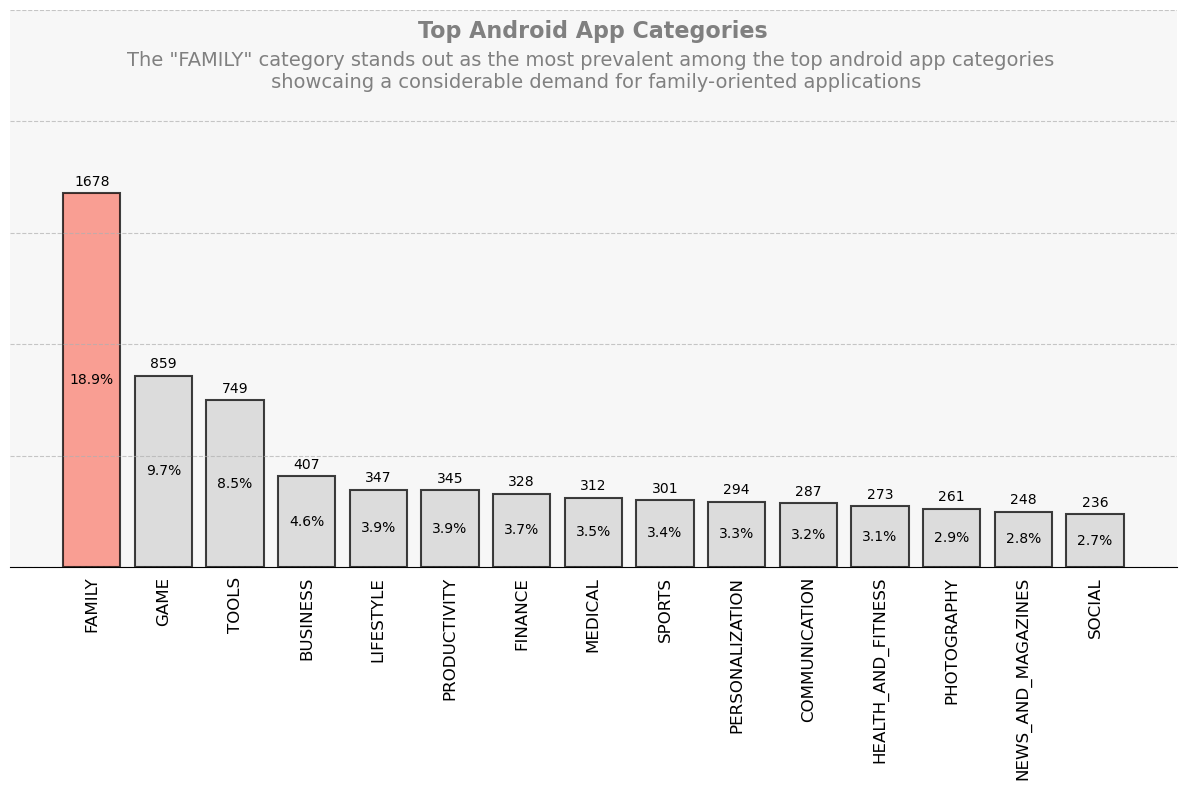

In [26]:
# Data
categories = final_apps["Category"].value_counts().index[:15]
counts = final_apps["Category"].value_counts().values[:15]

percentage = round(final_apps["Category"].value_counts(normalize = True)*100, 1)[:15]

# Create a Stylish bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(categories, counts, color = 'lightgray', alpha = 0.75, edgecolor = 'black', linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.grid(axis = 'x', linestyle = '')
plt.xticks(fontsize = 12) # Customized tick labels
plt.yticks(range(0, 3000, 500), [], fontsize = 12) # Customized tick labels and customized y-ticks range
plt.tick_params(bottom = 0, left = 0)

# Find the category with highest count
max_category = categories[counts.argmax()]

# Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(bar.get_x() +bar.get_width()/2, height/2, f'{perc}%', ha = 'center', va = 'center', fontsize = 10, color = 'black')
    
# Adding a background color 
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5, 0.95, 'Top Android App Categories', horizontalalignment = 'center', fontsize = 16,
         transform = plt.gca().transAxes, color = 'gray', fontweight = 'bold')

# Adding Conclusion inside the chart
plt.text(0.5, 0.86, 'The "FAMILY" category stands out as the most prevalent among the top android app categories \n \
showcaing a considerable demand for family-oriented applications', 
        horizontalalignment = 'center', fontsize = 14, transform = plt.gca().transAxes, color = 'gray')

# Removing Spines
bord = ['left', 'right', 'top']

for i in bord:
    plt.gca().spines[i].set_visible(False)
    
# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

## Most Popular Apps by Genre on Google Play
For the google play market, we actualy have data about the number of installs, so we should be get a clearer picture about genre popularity. However, the install numbers don't seems precise enough -- We can see that most values are open-ended(100+, 5000+ etc):

In [27]:
final_apps["Installs"].value_counts(normalize = True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [28]:
# Remove the messy values like '+ ,', and then convert the data-type to integer 
final_apps["Install_int"] = final_apps["Installs"].str.replace(",", "").str.replace("+", "").astype(int)
final_apps["Install_int"]

C:\Users\computer lab\AppData\Local\Temp\ipykernel_10236\3964203409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_apps["Install_int"] = final_apps["Installs"].str.replace(",", "").str.replace("+", "").astype(int)


0          10000
1        5000000
2       50000000
3         100000
4          50000
          ...   
9655        5000
9656         100
9657        1000
9658        1000
9659    10000000
Name: Install_int, Length: 8863, dtype: int32

In [29]:
install_frq = final_apps["Install_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Install_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [30]:
install_frq

Install_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [31]:
# Create a function to change number in units form
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [32]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

Install_int
1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: count, dtype: int64

In [33]:
install_per = round(final_apps["Install_int"].value_counts(normalize = True)*100,2).sort_index()
install_per = install_per[install_per.index > 500]
install_per

Install_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

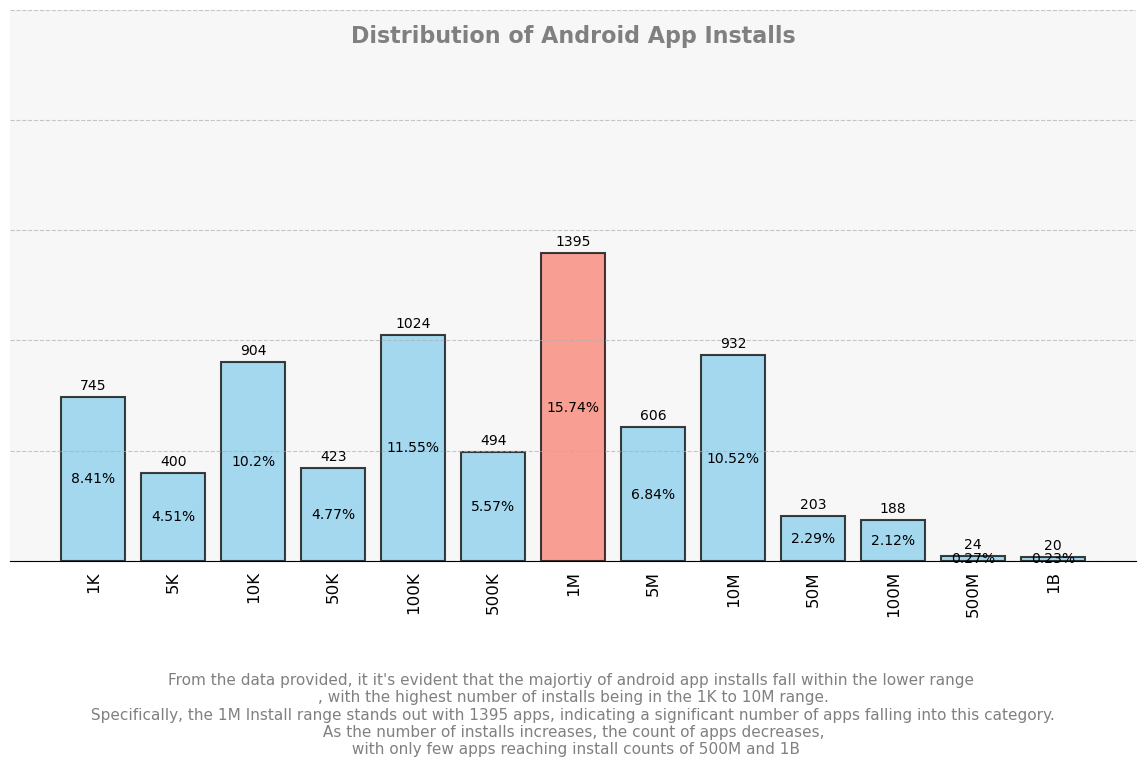

In [34]:
# Data
ctg = install_frq.index
cts = install_frq.values

prc = install_per.values

# Create a Stylish bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(ctg, cts, color = 'skyblue', alpha = 0.75, edgecolor = 'black', linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.grid(axis = 'x', linestyle = '')
plt.xticks(fontsize = 12) # Customized tick labels
plt.yticks(range(0, 3000, 500), [], fontsize = 12) # Customized tick labels and customized y-ticks range
plt.tick_params(bottom = 0, left = 0)

# Find the category with highest count
max_category = ctg[cts.argmax()]

# Highlight the bar for the category with highest count
max_count_index = list(ctg).index(max_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, prc):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(bar.get_x() +bar.get_width()/2, height/2, f'{perc}%', ha = 'center', va = 'center', fontsize = 10, color = 'black')
    
# Adding a background color 
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5, 0.94, 'Distribution of Android App Installs', horizontalalignment = 'center', fontsize = 16,
         transform = plt.gca().transAxes, color = 'gray', fontweight = 'bold')

# Adding Conclusion inside the chart
plt.text(0.5, -0.35, '''From the data provided, it it's evident that the majortiy of android app installs fall within \
the lower range \n, with the highest number of installs being in the 1K to 10M range.\n Specifically, the 1M Install range \
stands out with 1395 apps, indicating a significant number of apps falling into this category. \n As the number of installs \
increases, the count of apps decreases, \n with only few apps reaching install counts of 500M and 1B''', 
        horizontalalignment = 'center', fontsize = 11, transform = plt.gca().transAxes, color = 'gray')

# Removing Spines
bord = ['left', 'right', 'top']

for i in bord:
    plt.gca().spines[i].set_visible(False)
    
# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

In [35]:
final_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,100
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,1000
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1000


In [36]:
# Create a pivot table and check average of installes apps by category
pd.pivot_table(final_apps, values = "Install_int", index = "Category", aggfunc = 'mean')

,Install_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [37]:
# Display DataFrame without scientific Notation
pd.options.display.float_format = '{:.0f}'.format

In [38]:
install_categories = pd.pivot_table(final_apps, values = "Install_int", index = "Category", aggfunc = 'mean')
install_categories = install_categories.sort_values(by = "Install_int", ascending = False)
install_categories = install_categories["Install_int"]
install_categories

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [39]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [42]:
categories_units = install_categories.map(alphanumeric_units)
categories_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

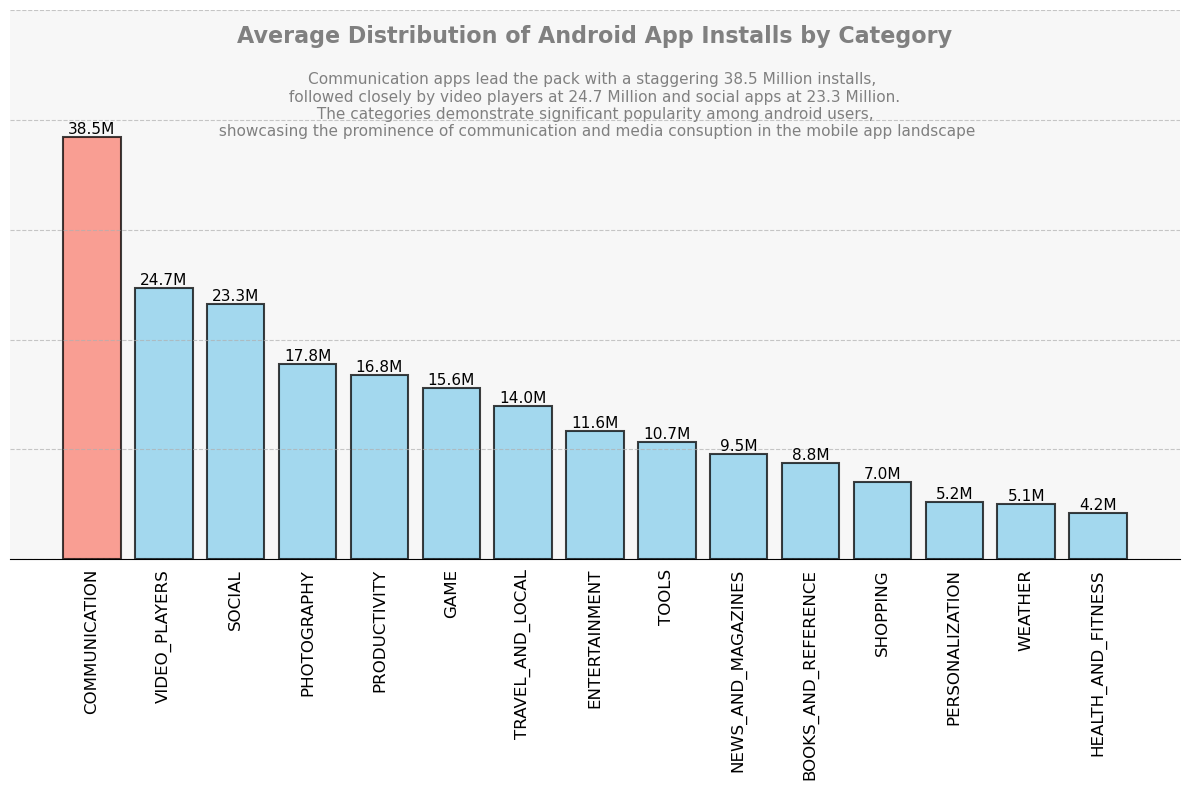

In [51]:
# Data
categories = install_categories.index[:15]
counts = install_categories.values[:15]

# Create a Stylish bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(categories, counts, color = 'skyblue', alpha = 0.75, edgecolor = 'black', linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.grid(axis = 'x', linestyle = '')
plt.xticks(fontsize = 12) # Customized tick labels
plt.yticks(range(0, 60000000, 10000000), [], fontsize = 12) # Customized tick labels and customized y-ticks range
plt.tick_params(bottom = 0, left = 0)

# Find the category with highest count
max_category = categories[counts.argmax()]

# Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, units in zip(bars, categories_units.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 25, units, ha = 'center', va = 'bottom', fontsize = 11)
    
# Adding a background color 
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

# Adding chart title inside the chart
plt.text(0.5, 0.94, 'Average Distribution of Android App Installs by Category', horizontalalignment = 'center', fontsize = 16,
         transform = plt.gca().transAxes, color = 'gray', fontweight = 'bold')

# Adding Conclusion inside the chart
plt.text(0.5, 0.77, '''Communication apps lead the pack with a staggering 38.5 Million installs, \n followed closely by \
video players at 24.7 Million and social apps at 23.3 Million. \n The categories demonstrate significant popularity among \
android users, \n showcasing the prominence of communication and media consuption in the mobile app landscape''', 
        horizontalalignment = 'center', fontsize = 11, transform = plt.gca().transAxes, color = 'gray')

# Removing Spines
bord = ['left', 'right', 'top']

for i in bord:
    plt.gca().spines[i].set_visible(False)
    
# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

In [52]:
# Let's Analyse Which application we need to create
category_group = final_apps.groupby("Category")

In [54]:
comm = category_group.get_group("COMMUNICATION").sort_values(by = "Install_int", ascending = False)
comm.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install_int
279,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
304,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
359,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
320,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
308,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [66]:
install_categories.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [58]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'

In [64]:
'''Now we can see that Category of COMMUNICATION has highest numbers of installations so if we will create application in this 
category than there is too many chances that it will be flop because there are many outstanding application are already
working'''
df = comm[["App", "Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
279,WhatsApp Messenger,1000000000,1B
304,Messenger – Text and Video Chat for Free,1000000000,1B
359,Hangouts,1000000000,1B
320,Google Chrome: Fast & Secure,1000000000,1B
308,Skype - free IM & video calls,1000000000,1B
347,Gmail,1000000000,1B
316,LINE: Free Calls & Messages,500000000,500M
3617,Viber Messenger,500000000,500M
324,UC Browser - Fast Download Private & Secure,500000000,500M
296,Google Duo - High Quality Video Calls,500000000,500M


In [65]:
df = category_group.get_group("SOCIAL").sort_values(by = "Install_int", ascending = False)
df = df[["App", "Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df
# Here are too many popular apps we can not compite them 

,App,Install_int,Install_int_unit
1879,Facebook,1000000000,1B
1885,Google+,1000000000,1B
1920,Instagram,1000000000,1B
1925,Snapchat,500000000,500M
1880,Facebook Lite,500000000,500M
2984,Tik Tok - including musical.ly,100000000,100M
1914,Tango - Live Video Broadcast,100000000,100M
5246,VK,100000000,100M
1883,Pinterest,100000000,100M
2989,BIGO LIVE - Live Stream,100000000,100M


In [68]:
# We can create this type of application with advance features so it will work according to our analysis
df = category_group.get_group("PRODUCTIVITY").sort_values(by = "Install_int", ascending = False)
df = df[["App", "Install_int"]].head(15)
df["Install_int_unit"] = df["Install_int"].map(alphanumeric_units)
df

,App,Install_int,Install_int_unit
2628,Google Drive,1000000000,1B
2565,Microsoft Word,500000000,500M
2657,Google Calendar,500000000,500M
2666,Cloud Print,500000000,500M
2585,Dropbox,500000000,500M
2629,Adobe Acrobat Reader,100000000,100M
2599,Samsung Notes,100000000,100M
2588,Google Docs,100000000,100M
2603,SwiftKey Keyboard,100000000,100M
6650,CamScanner - Phone PDF Creator,100000000,100M


# Analysis of Productivity Applications

### Conclusion
In conclusion, the development of a productivity application presents an exciting opportunity to empower users in optimizing their time, tasks, and overall efficiency.
By creating a user-friendly platform that seamlessly integrates into users' daily lives,we aim to address the challenges associated with modern productivity.

Through features such as task management, note-taking, collaboration tools, and time tracking, our productivity app strives to provide a holistic solution for individuals and teams alike. The focus on simplicity, intuitive design, and adaptability will ensure that users can effortlessly incorporate the app into their routines. As we embark on this project, we are committed to enhancing users' productivity, helping them achieve their goals, and ultimately contributing to a more organized and fulfilling lifestyle.